In [1]:
import numpy as np
from acrobotics.util import get_default_axes3d
from acrobotics.recources.robots import Kuka
from acrobotics.path import FreeOrientationPt
from acrobotics.geometry import Shape, Collection

In [2]:
robot = Kuka()

path = []
for s in np.linspace(0, 1, 15):
    xi = 0.8
    yi = s * 0.2 + (1-s) * (-0.2)
    zi = 0.2
    path.append(FreeOrientationPt([xi, yi, zi]))

floor_plane = Shape(0.5, 0.5, 0.1)
floor_plane_tf = np.array([[1, 0, 0, 0.80],
                            [0, 1, 0, 0.00],
                            [0, 0, 1, 0.12],
                            [0, 0, 0, 1]])

scene = Collection([floor_plane], [floor_plane_tf])

In [3]:
from acrobotics.planning import cart_to_joint_no_redundancy
from acrobotics.planning import get_shortest_path

In [9]:
solutions = []
# run_ns_values = [50, 100, 200, 300, 500, 750, 1000]
run_ns_values = [100, 1000, 2000, 5000, 7000]
for ns in run_ns_values:
    print('Running planner for ns = {}.'.format(ns))
    Q = cart_to_joint_no_redundancy(robot, path, scene, num_samples=ns)
    res = get_shortest_path(Q, method='dijkstra')
    solutions.append(res)

Running planner for ns = 100.
Processing point 0/15
Processing point 1/15
Processing point 2/15
Processing point 3/15
Processing point 4/15
Processing point 5/15
Processing point 6/15
Processing point 7/15
Processing point 8/15
Processing point 9/15
Processing point 10/15
Processing point 11/15
Processing point 12/15
Processing point 13/15
Processing point 14/15
Running planner for ns = 1000.
Processing point 0/15
Processing point 1/15
Processing point 2/15
Processing point 3/15
Processing point 4/15
Processing point 5/15
Processing point 6/15
Processing point 7/15
Processing point 8/15
Processing point 9/15
Processing point 10/15
Processing point 11/15
Processing point 12/15
Processing point 13/15
Processing point 14/15
Running planner for ns = 2000.
Processing point 0/15
Processing point 1/15
Processing point 2/15
Processing point 3/15
Processing point 4/15
Processing point 5/15
Processing point 6/15
Processing point 7/15
Processing point 8/15
Processing point 9/15
Processing point 1

In [13]:
pl = [s['length'] for s in solutions[1:]]
pl

[5.107024669647217, 3.710268974304199, 2.8270692825317383, 2.6454219818115234]

In [12]:
solutions

[{'success': False},
 {'success': True,
  'path': [array([-0.21131438,  1.38907814, -0.28667527, -0.25551593, -1.26935339,
          -0.72280204]),
   array([-0.17974417,  1.45057273, -0.35662347, -0.27229333, -0.97760522,
          -0.72776312]),
   array([-0.12525998,  1.46312523, -0.38130003, -0.46317941, -0.94991016,
          -0.63812554]),
   array([-0.11400404,  1.45095193, -0.35418367, -0.22553173, -1.06831956,
          -0.53780884]),
   array([-0.09281805,  1.45363033, -0.35402742, -0.11031437, -1.08530283,
          -0.4332816 ]),
   array([-0.05289744,  1.4526031 , -0.35358363, -0.14362232, -1.11296654,
          -0.54214811]),
   array([ 0.0034354 ,  1.46381342, -0.37258819, -0.31729022, -1.0611496 ,
          -0.17638798]),
   array([ 0.03825275,  1.45866346, -0.36621103, -0.30394375, -1.09498417,
           0.10658967]),
   array([ 0.07197049,  1.44220197, -0.34733516, -0.27639005, -1.18113136,
           0.15925582]),
   array([ 0.10412584,  1.43772745, -0.34121796, -0.

In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Path length in C-space')

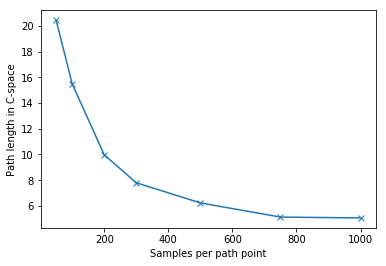

In [8]:
plt.plot(run_ns_values, pl, 'x-')
plt.xlabel("Samples per path point")
plt.ylabel("Path length in C-space")